<a href="https://colab.research.google.com/github/yain22/Theory-of-Linear-Models-in-R-and-Python/blob/master/Theory_of_Linear_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Theory of Linear Model

 $$y = X\beta  +  \epsilon, \quad \epsilon \sim N(0,\sigma^2 I),\quad X \in R^{n \times p} $$

 $$\hat{\beta} = [X^{\top}X]^{-1}X^{\top}y \in R^p$$
 $$P_X = X[X^{\top}X]^{-1}X^{\top} \in R^{n \times n}$$
 $$\hat{\sigma}^2 = \frac{y^{\top}[I - P_X]y}{n-p} = \frac{\|[I - P_X]y \|^2}{n-p} $$


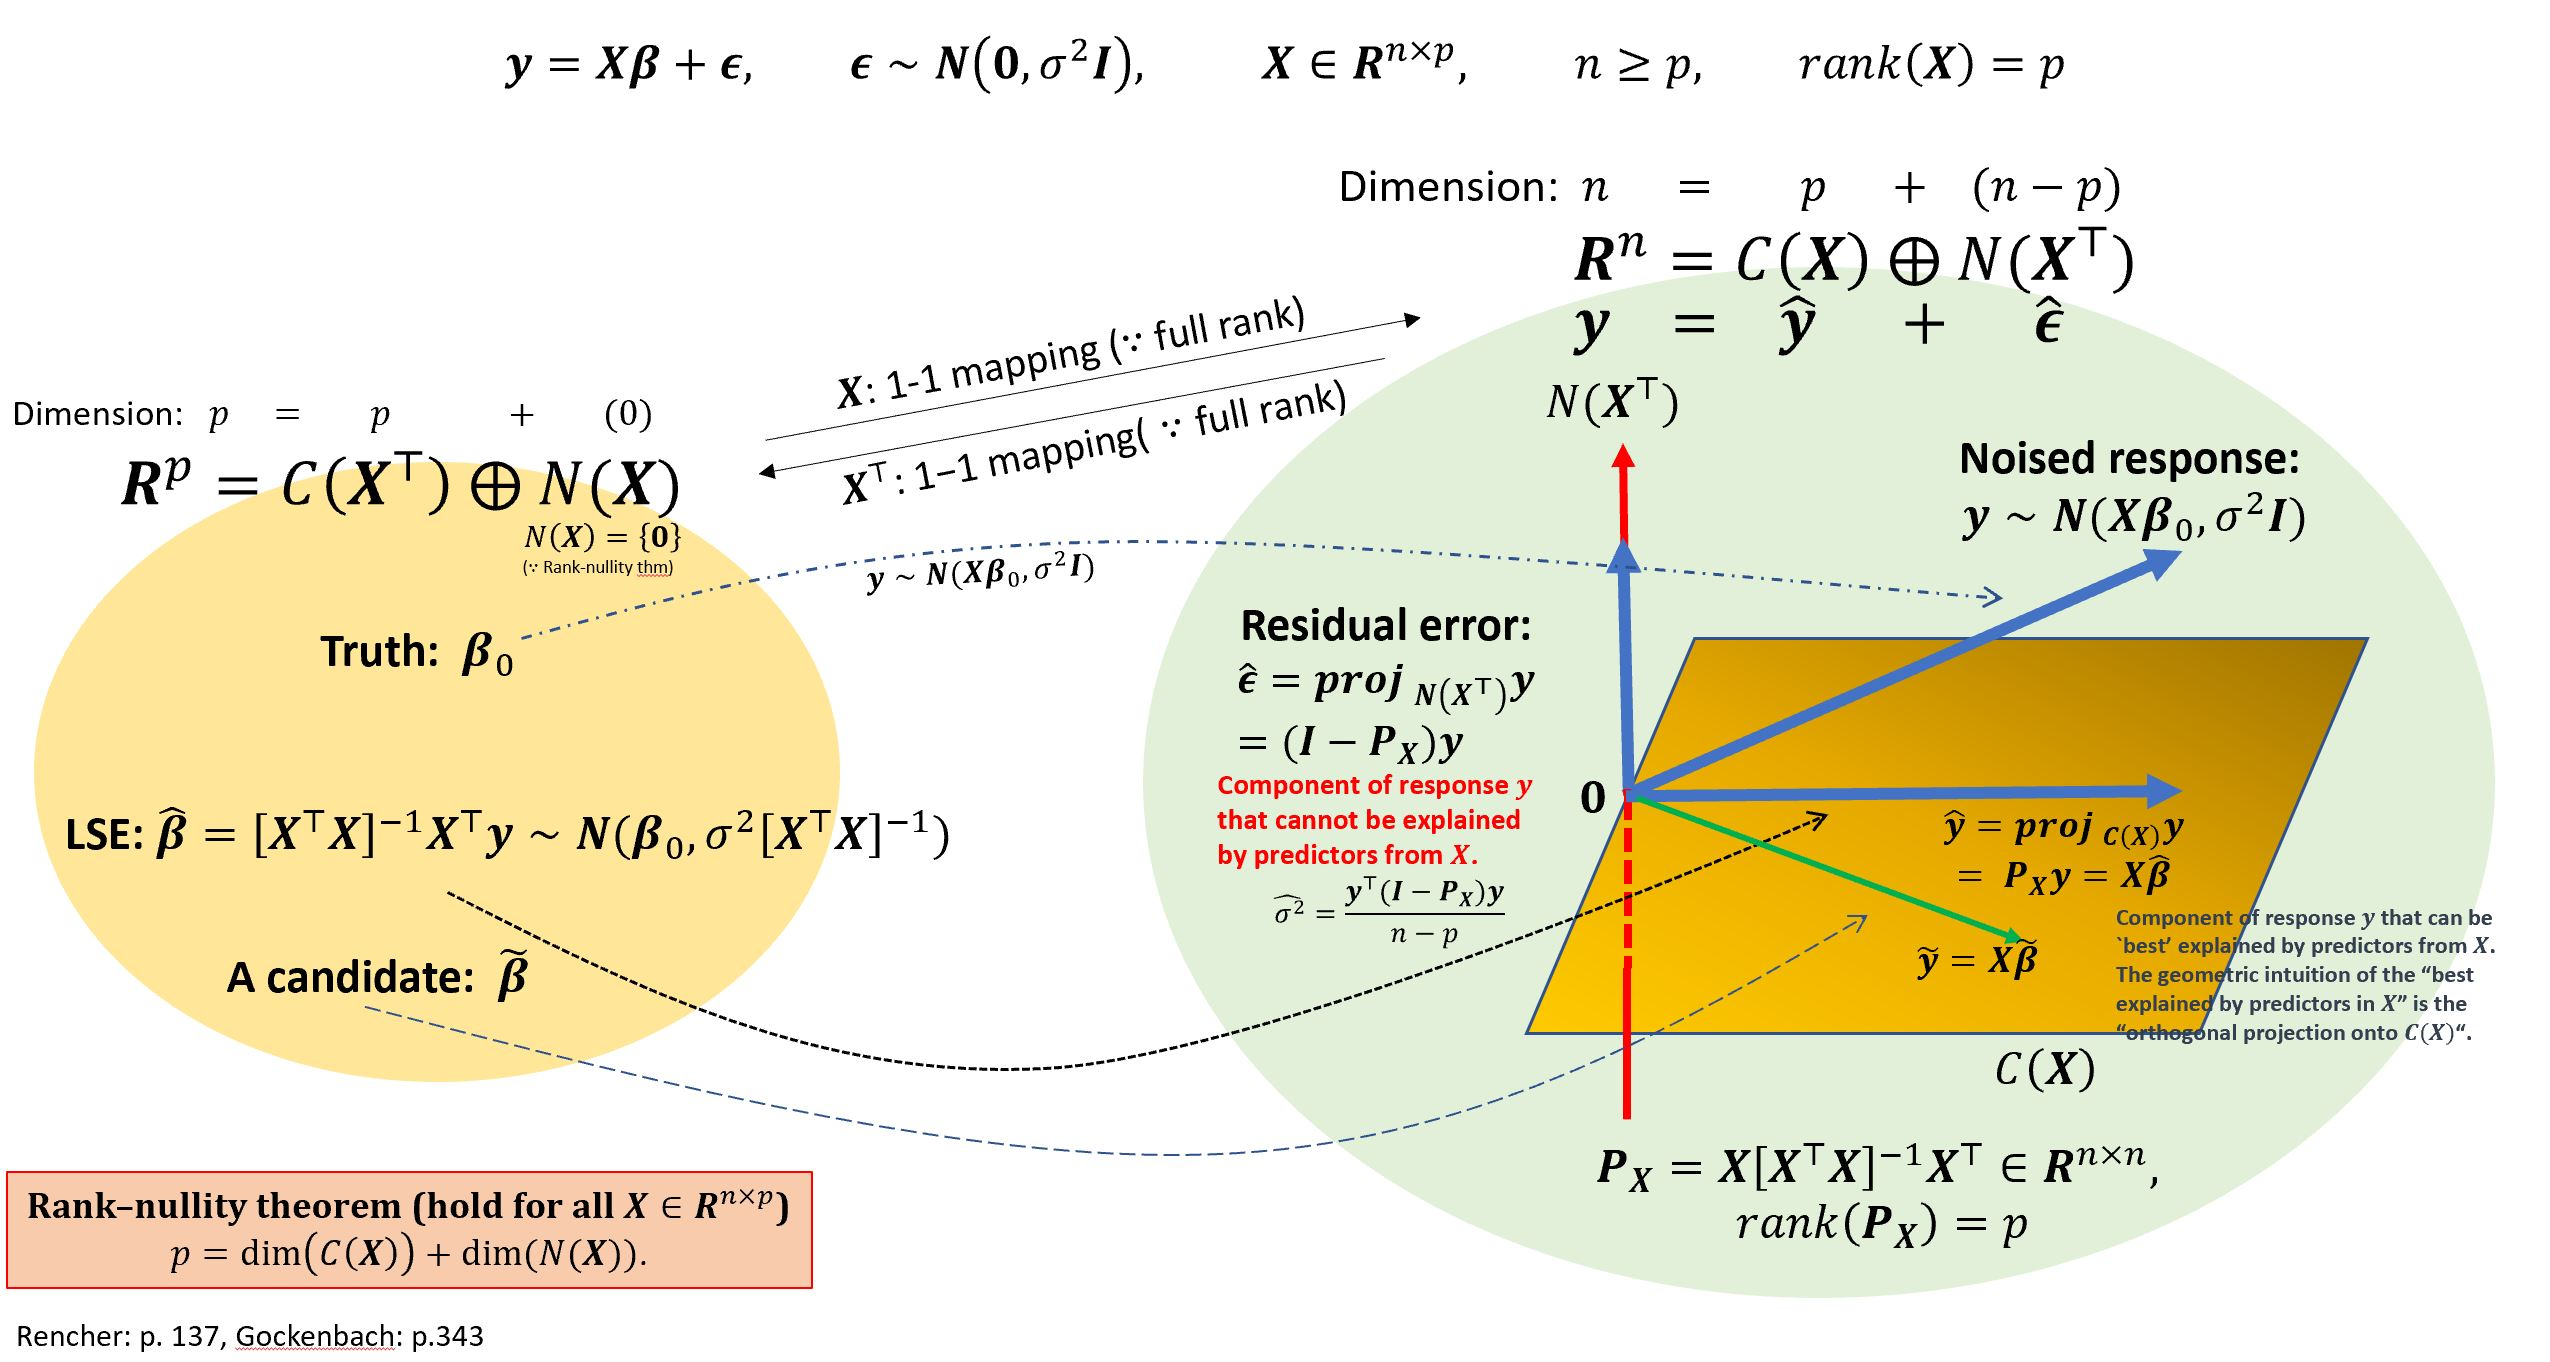

In [ ]:
install.packages("mvtnorm")
library("mvtnorm")

set.seed(1)
n = 100
p = 5
X = matrix(data = rnorm(n = n*p), nrow = n, ncol = p)
beta_0 = rnorm(n = p)
sigma.sq_0 = 0.001
y = c(rmvnorm(n = 1, mean = X%*%beta_0, sigma = sigma.sq_0*diag(n))) 
P.X = X%*%solve(t(X)%*%X)%*%t(X)


# Estimators
beta.hat = solve(t(X)%*%X)%*%t(X)%*%y
sigma.sq.hat = (t(y)%*%(diag(n) - P.X)%*%y)/(n-p)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



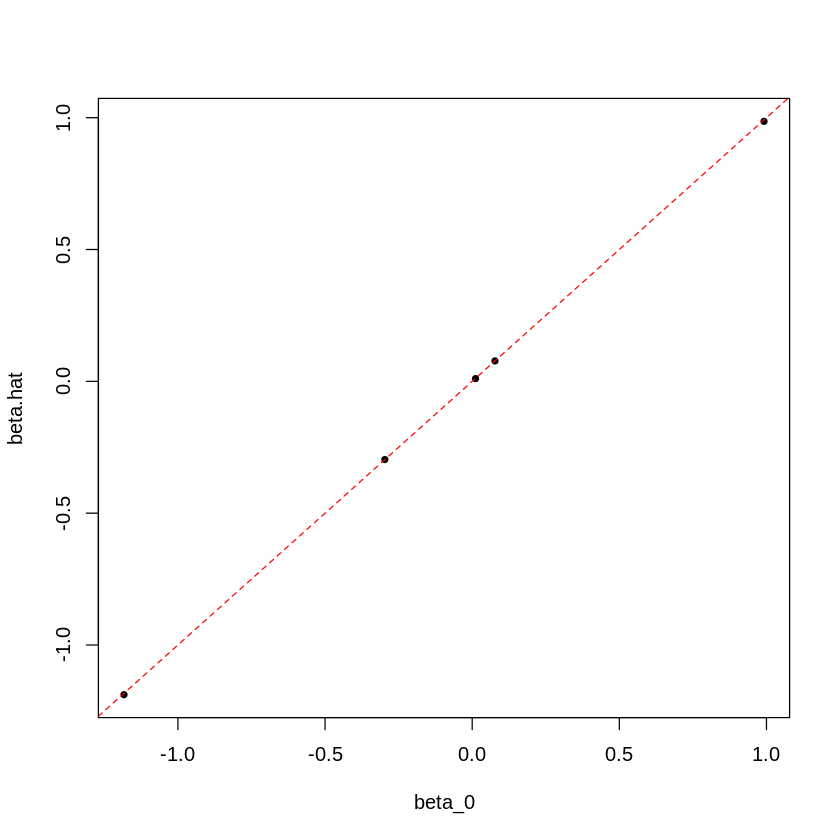

In [ ]:
plot(x = beta_0, y = beta.hat, pch = 20  ) ; abline( a = 0, b = 1, col = "red", lty = 2)

In [ ]:
sigma.sq_0 ; sigma.sq.hat

[1] 0.001

0.0009039501


# F - test in linear model (Reduced vs. full model )

Sources: [link text](https://dnett.github.io/S510/03ReducedVsFull.pdf), [link text](https://dnett.github.io/S510/stat510.html)




Assume the linear regression with Gaussian error:
$$ y = X \beta + \epsilon, \quad X\in R^{n \times p}, \quad \epsilon \sim N(0,\sigma^2I).$$

Suppose there is some matrix $X_1 \in R^{n \times p_1}$ such that $C(X_1) \in C(X)$.

The goal is to test:
$$H_0: E[y] \in C(X_1) \text{   vs.   } H_a: E[y] \in C(X) - C(X_1).$$

The reduced (null) model corresponds to the null hypothesis. 


Example 1) 
Given full rank matrix $X$, devides $X$ into 
$
X= \begin{bmatrix} 
X_1 | X_2
\end{bmatrix} \in R^{n \times (p_1 + p_2)}$.


Example 2) 
$X_1 = \begin{bmatrix} 
1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 
\end{bmatrix}$ and 
$X = 
\begin{bmatrix} 
1 &0 &0 \\
1 &0 &0 \\
0 &1 &0 \\ 
0 &1 &0 \\ 
0 &0 &1 \\ 
0 &0 &1 
\end{bmatrix}.
$

Under null model is true, we have F-test statistics
$$
\Large
F = \frac{y^\top (P_X - P_{X_1})y/(Rank(X) - Rank(X_1))}{
y^\top (I - P_X)y/(n - Rank(X))}
 \sim F_{(Rank(X) - Rank(X_1)),(n - Rank(X))}.
$$

Note that 
$$
\large
F = \frac{
  \frac{y^\top (P_X - P_{X_1})y}{Rank(X) - Rank(X_1)}
  }{
\frac{y^\top (I - P_X)y}{n - Rank(X)}
  }
  =
  \frac{
  \frac{y^\top \{(I- P_{X_1}) - (I - P_X ) \} y}{Rank(X) - Rank(X_1)}
  }{
\frac{y^\top (I - P_X)y}{n - Rank(X)}
  }
  =
  \frac{
  \frac{y^\top (I- P_{X_1})y - y^\top(I - P_X )y}{(n - Rank(X_1)) - (n -Rank(X))  }}{
\frac{y^\top (I - P_X)y}{n - Rank(X)}
  }
  $$

  $$
  \Large
  F =
 \frac{
  \frac{SSE_{reduced} - SSE_{full}}{DFE_{reduced} - DFE_{full}}}{
\frac{SSE_{full}}{DFE_{full}}
  }.
  $$


## Example problem (Lack of Linear Fit): 

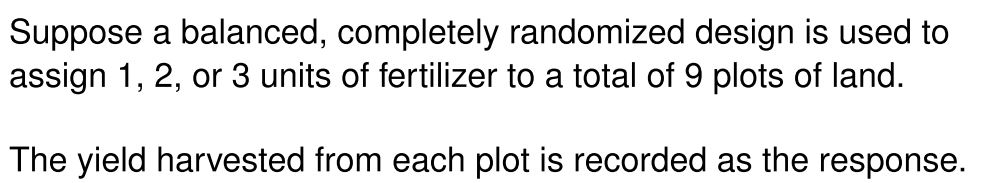

Let's generate some artificial response

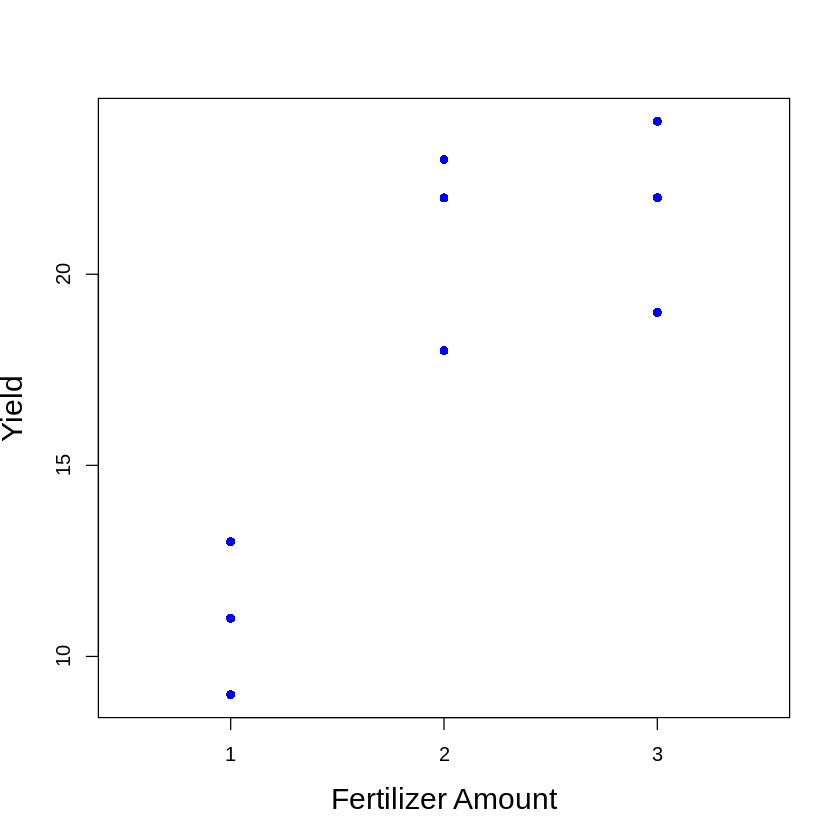

In [ ]:
x=rep(1:3,each=3)
y=c(11,13,9,18,22,23,19,24,22)
plot(x,y,pch=16,col=4,xlim=c(.5,3.5), xlab="Fertilizer Amount", ylab="Yield",axes=F,cex.lab=1.5)
axis(1,labels=1:3,at=1:3)
axis(2)
box()

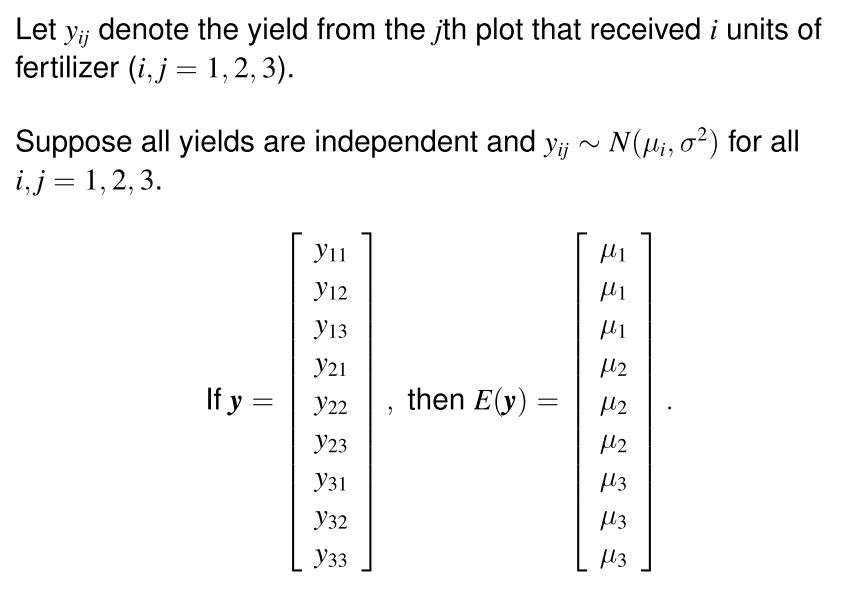

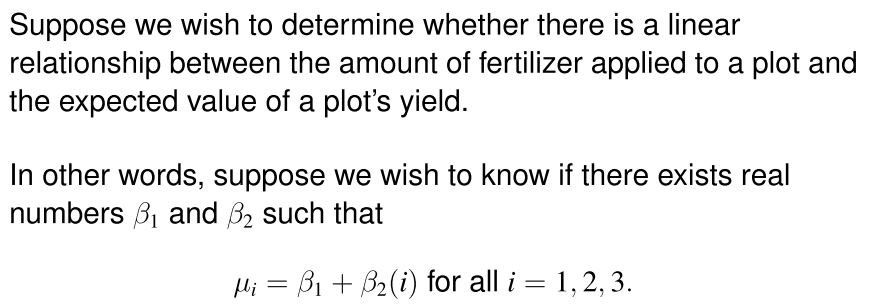

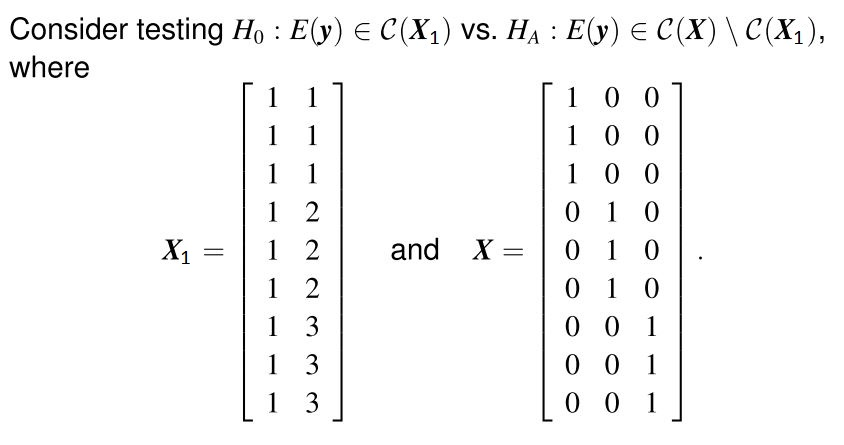

Note that 

(1) Number of observations $n = 9$;

(2) $C(X_1) \in C(X)$;

(3) $rank(X_1) = 2$ and $rank(X) = 3$.


Under null model is true, we have F-test statistics
$$F = \frac{y^\top (P_X - P_{X_1})y/(3 - 1)}{
y^\top (I - P_X)y/(9 - 3)}
 \sim F_{(Rank(X) - Rank(X_1)),(n - Rank(X))}.
$$


In [ ]:
X1=model.matrix(~x) # Construct Design Matrices for linear model with (unspecified response) ~ (intercept) + x ; x = c(1:4), y = c(2:5), mat <- model.matrix(object = ~ x + y)
X=model.matrix(~0+factor(x))
X1 ; X

In [46]:
# Define projection function
proj=function(x){ x%*%ginv(t(x)%*%x)%*%t(x)} # ginv: generalized inverse matrix
library(MASS)
PX1=proj(X1)
PX=proj(X)

0.03348515


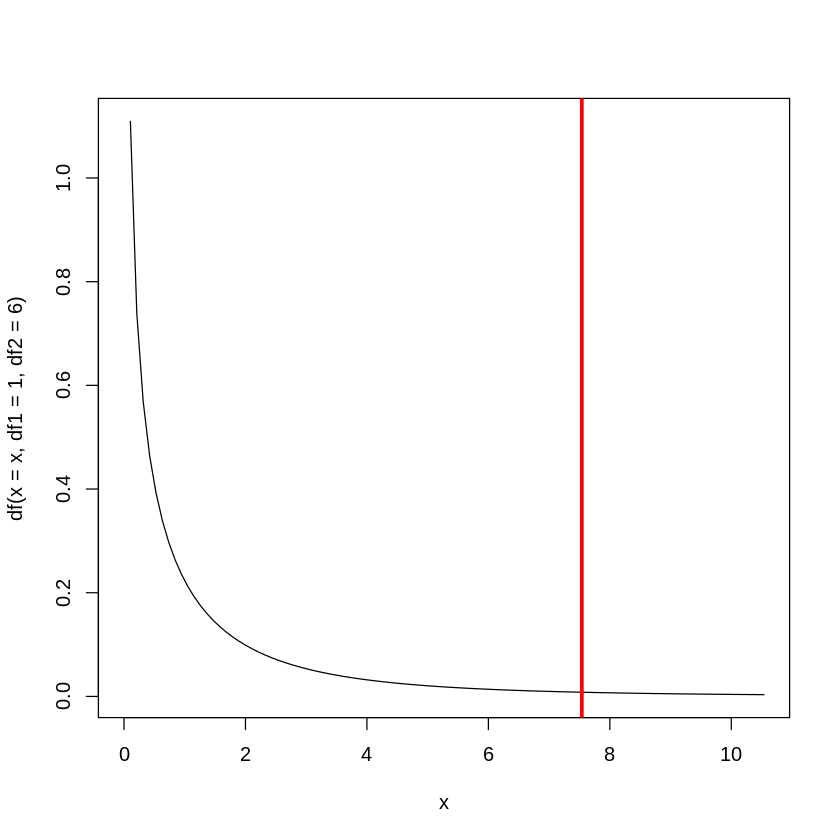

In [58]:
# Method1: Direct calculation

Fstat=(t(y)%*%(PX-PX1)%*%y/1)/(t(y)%*%(diag(rep(1,9))-PX)%*%y/(9-3))
pvalue=pf(q = Fstat, df1 = 1,df2 = 6, lower.tail = FALSE)

curve(df(x = x, df1 = 1,df2 = 6), xlim = c(0, Fstat+3 ))
abline(v = Fstat, lwd = 3, col = "red")
pvalue

In [62]:
# Method2: 
reduced=lm(y~x)
full=lm(y~0+factor(x))

rvsf=function(reduced,full){
  sser=deviance(reduced) 
  ssef=deviance(full)
  dfer=reduced$df
  dfef=full$df
  dfn=dfer-dfef

  #############################################
  Fstat=(sser-ssef)/dfn/(ssef/dfef)
  #############################################
  
  pvalue=1-pf(Fstat,dfn,dfef)

  list(Fstat=Fstat,dfn=dfn,dfd=dfef,pvalue=pvalue)
}
rvsf(reduced,full)

$Fstat
[1] 7.538462

$dfn
[1] 1

$dfd
[1] 6

$pvalue
[1] 0.03348515